In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('study_time_score.csv')
data.head()

,study_time,score
0,7.490802,69.615511
1,19.014286,90.858994
2,14.639879,88.500686
3,11.973170,82.985853
4,3.120373,60.599884


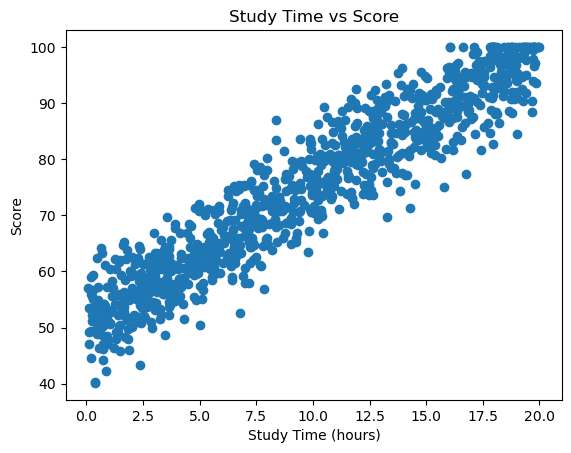

In [3]:
plt.scatter(data['study_time'], data['score'])
plt.xlabel('Study Time (hours)')
plt.ylabel('Score')
plt.title('Study Time vs Score')
plt.show()

In [4]:
def loss_function(m, b, points):
    total_loss = 0
    for i in range(len(points)):
        x = points[i][0]
        y = points.iloc[i, 1]
        total_loss += (y - (m*x - b))**2
    return total_loss/len(points)

In [5]:
def gradient_descent(m, b, points, l):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    
    for i in range(n):
        x = points[i][0]
        y = points[i][1]
        m_gradient += -(2/n) * x * (y - (m*x + b))
        b_gradient += -(2/n) *  (y - (m*x + b))
    
    m_new = m - l*m_gradient
    b_new = b - l*b_gradient
    return m_new, b_new

Epoch 0
0 0
Epoch 500
3.045534451054523 42.909531155325
Epoch 1000
2.5298886588356875 49.74529836146676
Epoch 1500
2.4468308189245054 50.84637213506382
Epoch 2000
2.4334522461235344 51.02372800724951
Epoch 2500
2.431297287478064 51.05229567106368
Epoch 3000
2.4309501767037847 51.05689721825658
Epoch 3500
2.4308942657052732 51.057638414201264
Epoch 4000
2.4308852598201587 51.05775780261684
Epoch 4500
2.430883809193827 51.05777703315078
2.430883575533644 51.057780130716274


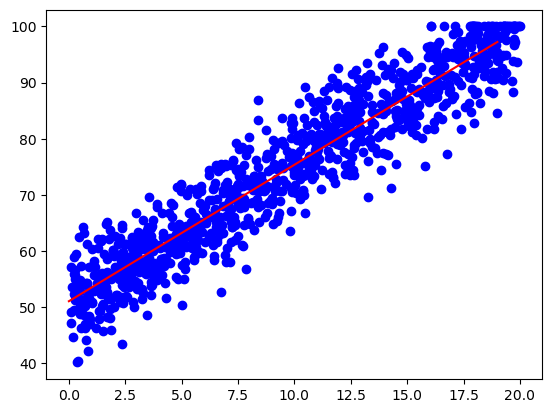

In [43]:
m = 0
b = 0
l = 0.007
epochs = 5000

for i in range(epochs):
    if i % 500 == 0:
        print(f'Epoch {i}')
        print(m, b)
    m, b = gradient_descent(m, b, data.values, l)

plt.scatter(data.study_time, data.score, color='blue')
plt.plot(list(range(0, 20)), [m*x + b  for x in range(0, 20)], color='red')

print(m, b)

[2.43088353] 51.05778072545566


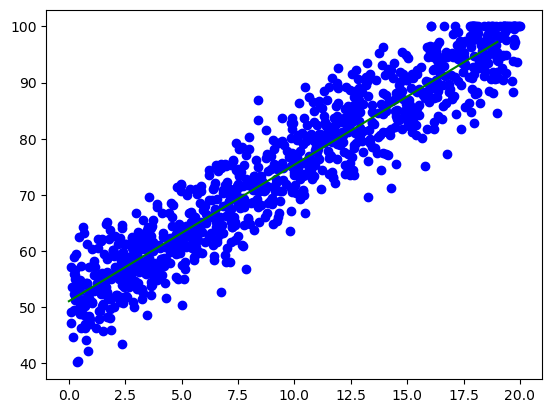

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = data[['study_time']]
y = data['score']
model.fit(x, y)
print(model.coef_, model.intercept_)

plt.scatter(data.study_time, data.score, color = 'blue')
plt.plot(list(range(0, 20)), [model.coef_[0]*x + model.intercept_ for x in range(20)], color = 'green')